# 3.8 推論の実施

- 本ファイルでは、学習させたPSPNetでセマンティックセグメンテーションを行います。


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 学習目標


1.	セマンティックセグメンテーションの推論を実装できるようになる


# 事前準備

- 学習させた重みパラメータ「pspnet50_30.pth」をフォルダ「weights」に用意する。

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch

# ファイルパスリストを用意

In [8]:
import sys

In [9]:
sys.path.append('/content/drive/MyDrive/3_semantic_segmentation/')

/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/21gray_datasets/2010_001292.jpg
/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/21anno_datasets_black/2010_001292.png
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
torch.Size([1, 475, 475])
------------------------------------------------
torch.Size([475, 475])
-------------------------------------------------
(tensor([[[0.0098, 0.3627, 0.9510,  ..., 0.6961, 0.8922, 0.3431],
         [0.0098, 0.3431, 0.9314,  ..., 0.6569, 0.8529, 0.2647],
         [0.0294, 0.3235, 0.8725,  ..., 0.7941, 0.9510, 0.3627],
         ...,
         [1.4216, 1.5784, 1.0294,  ..., 0.1275, 0.4020, 1.1078],
         [1.3431, 1.3824, 0.4804,  ..., 0.9510, 0.8333, 0.8137],
         [1.4216, 1.1078, 0.2059,  ..., 1.3431, 1.0294, 0.5000]]]), tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
   

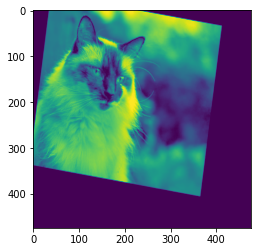

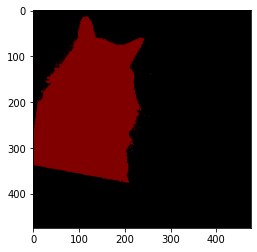

(475, 475, 1)


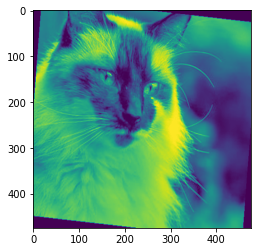

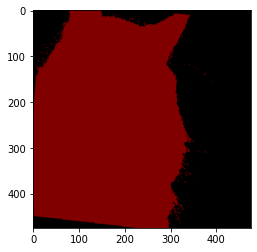

(475, 475, 1)


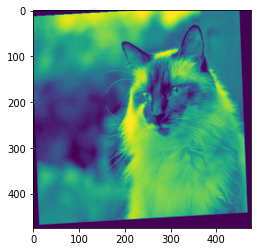

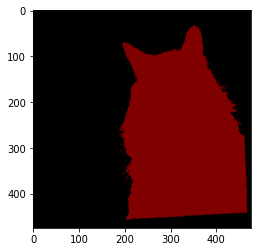

(475, 475, 1)


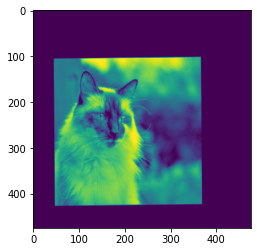

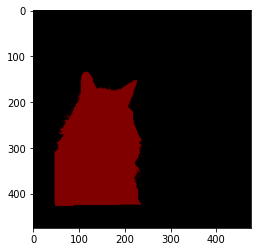

(475, 475, 1)


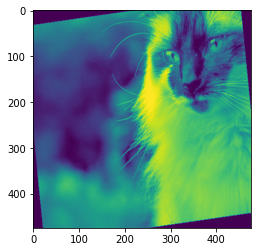

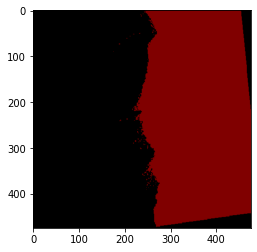

(475, 475, 1)


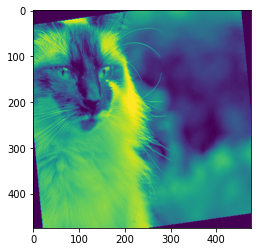

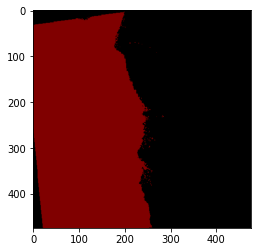

(475, 475, 1)


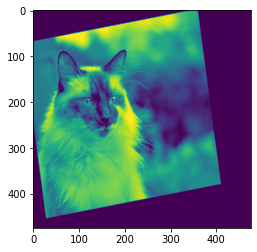

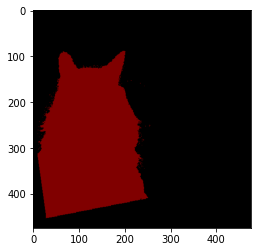

(475, 475, 1)


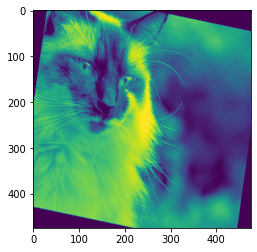

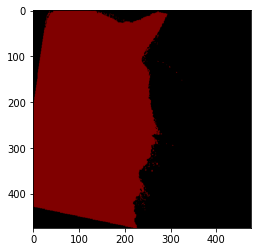

(475, 475, 1)


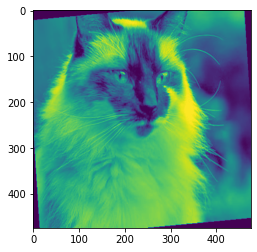

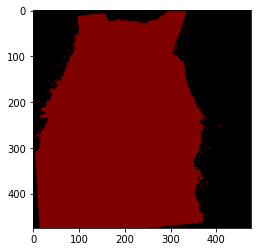

(475, 475, 1)


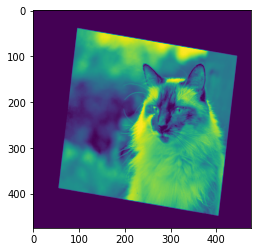

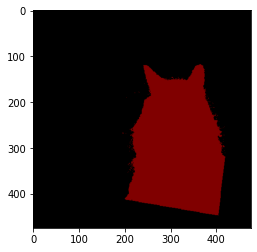

(475, 475, 1)


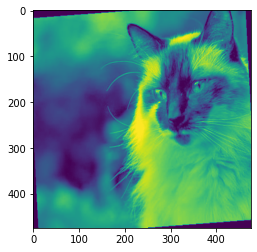

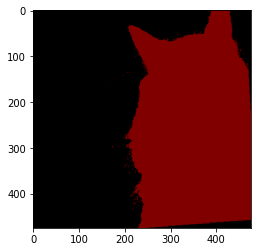

(475, 475, 1)


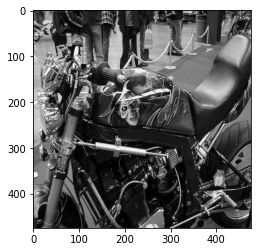

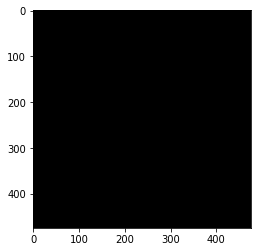

In [10]:
from utils.dataloader_1ch import make_datapath_list, DataTransform


# ファイルパスリスト作成
rootpath = "/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/"
train_img_list, train_anno_list, val_img_list, val_anno_list = make_datapath_list(
    rootpath=rootpath)

# 後ほどアノテーション画像のみを使用する


# ネットワークを用意

In [11]:
from utils.pspnet import PSPNet
from torchsummary import summary


In [12]:
net = PSPNet(n_classes=2)

In [13]:
net150 = PSPNet(n_classes=150)

In [14]:
net150.to("cuda")

PSPNet(
  (feature_conv): FeatureMap_convolution(
    (cbnr_1): conv2DBatchNormRelu(
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_2): conv2DBatchNormRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_3): conv2DBatchNormRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_res_1): ResidualBlockPSP(
    (block1): bottleNec

In [20]:
net.to("cuda")

PSPNet(
  (feature_conv): FeatureMap_convolution(
    (cbnr_1): conv2DBatchNormRelu(
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_2): conv2DBatchNormRelu(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (cbnr_3): conv2DBatchNormRelu(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (feature_res_1): ResidualBlockPSP(
    (block1): bottleNec

In [21]:
summary(net,(1,475,475))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 238, 238]             576
       BatchNorm2d-2         [-1, 64, 238, 238]             128
              ReLU-3         [-1, 64, 238, 238]               0
conv2DBatchNormRelu-4         [-1, 64, 238, 238]               0
            Conv2d-5         [-1, 64, 238, 238]          36,864
       BatchNorm2d-6         [-1, 64, 238, 238]             128
              ReLU-7         [-1, 64, 238, 238]               0
conv2DBatchNormRelu-8         [-1, 64, 238, 238]               0
            Conv2d-9        [-1, 128, 238, 238]          73,728
      BatchNorm2d-10        [-1, 128, 238, 238]             256
             ReLU-11        [-1, 128, 238, 238]               0
conv2DBatchNormRelu-12        [-1, 128, 238, 238]               0
        MaxPool2d-13        [-1, 128, 119, 119]               0
FeatureMap_convolution-14        [-

In [15]:

# 学習済みパラメータをロード
state_dict = torch.load("/content/drive/MyDrive/3_semantic_segmentation/weights/pspnet50_30_1231.pth",
                        map_location={'cuda:0': 'cpu'})
net150.load_state_dict(state_dict)

print('ネットワーク設定完了：学習済みの重みをロードしました')


ネットワーク設定完了：学習済みの重みをロードしました


# 推論実行

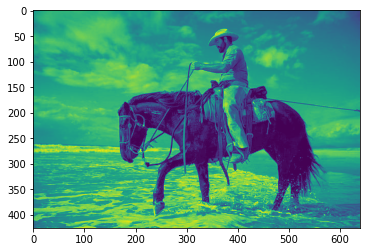

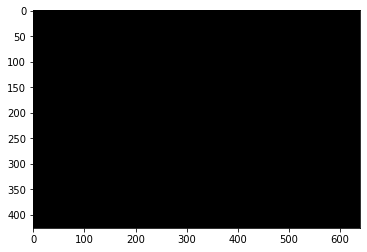

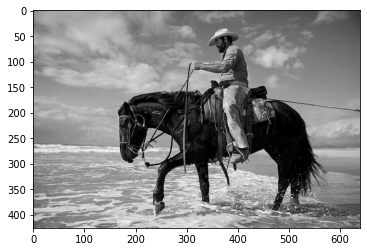

<Figure size 432x288 with 0 Axes>

In [ ]:
# 1. 元画像の表示
image_file_path = "/content/drive/MyDrive/cat_datasets/cowboy_gray.jpeg"
img = Image.open(image_file_path)   # [高さ][幅][色RGB]
img_width, img_height = img.size
plt.imshow(img)
plt.show()

# 2. 前処理クラスの作成
# color_mean = (0.485, 0.456, 0.406)
# color_std = (0.229, 0.224, 0.225)
color_mean = 0.5 #1ch
color_std = 0.2
transform = DataTransform(
    input_size=475, color_mean=color_mean, color_std=color_std)

# 3. 前処理
# 適当なアノテーション画像を用意し、さらにカラーパレットの情報を抜き出す
anno_file_path = val_anno_list[0]
anno_class_img = Image.open(anno_file_path)   # [高さ][幅]
p_palette = anno_class_img.getpalette()
phase = "val"
img, anno_class_img = transform(phase, img, anno_class_img)


# 4. PSPNetで推論する
net.eval()
x = img.unsqueeze(0)  # ミニバッチ化：torch.Size([1, 3, 475, 475])
outputs = net(x)
y = outputs[0]  # AuxLoss側は無視 yのサイズはtorch.Size([1, 21, 475, 475])


# 5. PSPNetの出力から最大クラスを求め、カラーパレット形式にし、画像サイズを元に戻す
y = y[0].detach().numpy()  # y：torch.Size([1, 21, 475, 475])
y = np.argmax(y, axis=0)
anno_class_img = Image.fromarray(np.uint8(y), mode="P")
anno_class_img = anno_class_img.resize((img_width, img_height), Image.NEAREST)
anno_class_img.putpalette(p_palette)
plt.imshow(anno_class_img)
plt.show()


# 6. 画像を透過させて重ねる
trans_img = Image.new('RGBA', anno_class_img.size, (0, 0, 0, 0))
anno_class_img = anno_class_img.convert('RGBA')  # カラーパレット形式をRGBAに変換

for x in range(img_width):
    for y in range(img_height):
        # 推論結果画像のピクセルデータを取得
        pixel = anno_class_img.getpixel((x, y))
        r, g, b, a = pixel

        # (0, 0, 0)の背景ならそのままにして透過させる
        if pixel[0] == 0 and pixel[1] == 0 and pixel[2] == 0:
            continue
        else:
            # それ以外の色は用意した画像にピクセルを書き込む
            trans_img.putpixel((x, y), (r, g, b, 150))
            # 150は透過度の大きさを指定している

img = Image.open(image_file_path)   # [高さ][幅][色RGB]
result = Image.alpha_composite(img.convert('RGBA'), trans_img)
plt.imshow(result)
plt.show()
plt.clf()


In [ ]:
def Segmentation(path):
  # 1. 元画像の表示
  image_file_path = path
  img = Image.open(image_file_path)   # [高さ][幅][色RGB]
  img_width, img_height = img.size
  plt.imshow(img)
  plt.show()

  # 2. 前処理クラスの作成
  # color_mean = (0.485, 0.456, 0.406)
  # color_std = (0.229, 0.224, 0.225)
  color_mean = 0.5 #1ch
  color_std = 0.2
  transform = DataTransform(
      input_size=475, color_mean=color_mean, color_std=color_std)

  # 3. 前処理
  # 適当なアノテーション画像を用意し、さらにカラーパレットの情報を抜き出す
  anno_file_path = val_anno_list[0]
  anno_class_img = Image.open(anno_file_path)   # [高さ][幅]
  p_palette = anno_class_img.getpalette()
  phase = "val"
  img, anno_class_img = transform(phase, img, anno_class_img)


  # 4. PSPNetで推論する
  net.eval()
  x = img.unsqueeze(0)  # ミニバッチ化：torch.Size([1, 3, 475, 475])
  outputs = net(x)
  y = outputs[0]  # AuxLoss側は無視 yのサイズはtorch.Size([1, 21, 475, 475])


  # 5. PSPNetの出力から最大クラスを求め、カラーパレット形式にし、画像サイズを元に戻す
  y = y[0].detach().numpy()  # y：torch.Size([1, 21, 475, 475])
  y = np.argmax(y, axis=0)
  anno_class_img = Image.fromarray(np.uint8(y), mode="P")
  anno_class_img = anno_class_img.resize((img_width, img_height), Image.NEAREST)
  anno_class_img.putpalette(p_palette)
  plt.imshow(anno_class_img)
  plt.show()


  # 6. 画像を透過させて重ねる
  trans_img = Image.new('RGBA', anno_class_img.size, (0, 0, 0, 0))
  anno_class_img = anno_class_img.convert('RGBA')  # カラーパレット形式をRGBAに変換

  for x in range(img_width):
      for y in range(img_height):
          # 推論結果画像のピクセルデータを取得
          pixel = anno_class_img.getpixel((x, y))
          r, g, b, a = pixel

          # (0, 0, 0)の背景ならそのままにして透過させる
          if pixel[0] == 0 and pixel[1] == 0 and pixel[2] == 0:
              continue
          else:
              # それ以外の色は用意した画像にピクセルを書き込む
              trans_img.putpixel((x, y), (r, g, b, 150))
              # 150は透過度の大きさを指定している

  img = Image.open(image_file_path)   # [高さ][幅][色RGB]
  result = Image.alpha_composite(img.convert('RGBA'), trans_img)
  plt.imshow(result)
  plt.show()
  plt.clf()

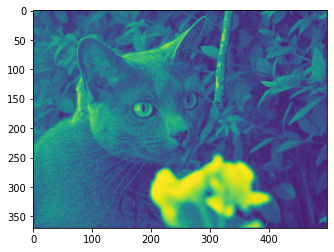

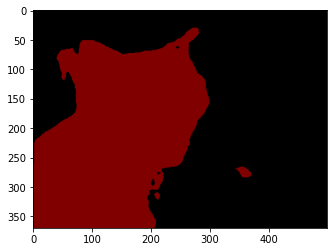

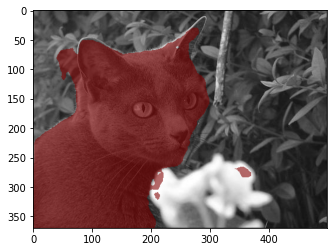

<Figure size 432x288 with 0 Axes>

In [ ]:
Segmentation('/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2009_005160.jpg')

In [ ]:
val_img_list

['/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2009_005160.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2008_001876.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2007_000549.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2007_002760.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2010_003696.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2010_000941.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2009_003904.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2010_000519.jpg',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/gray_cat_JPEGImages/2008_007548.jpg',
 '/content

In [ ]:
for i in val_img_list:
  Segmentation(i)

Output hidden; open in https://colab.research.google.com to view.

以上